In [79]:
import imutils;
from PIL import Image;
import cv2;
from skimage.metrics import structural_similarity;
import requests;

In [80]:
original=Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg",stream=True).raw)
tampered=Image.open(requests.get("https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png",stream=True).raw)

In [81]:
original=original.resize((224,224))
original.save("images/original.png")

In [82]:
tampered=tampered.resize((224,224))
tampered.save("images/tampered.png")

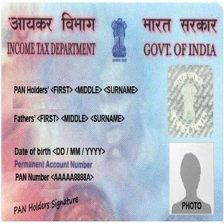

In [83]:
original

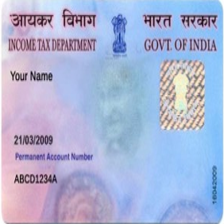

In [84]:
tampered

In [85]:
original=cv2.imread("images/original.png")
tampered=cv2.imread("images/tampered.png")

In [86]:
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [87]:
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff*255).astype("uint8")
print("SSIM:{}".format(score))

SSIM:0.3277066717867821


In [88]:
threshold=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
contours=cv2.findContours(threshold.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(contours)

In [89]:
for c in contours:
    (x,y,w,h)=cv2.boundingRect(c)
    cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

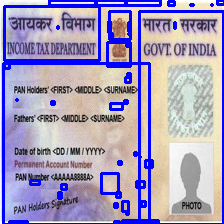

In [90]:
original_image=Image.fromarray(original)
original_image

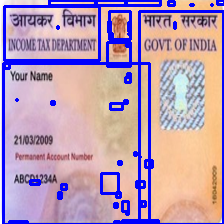

In [91]:
tampered_image=Image.fromarray(tampered)
tampered_image

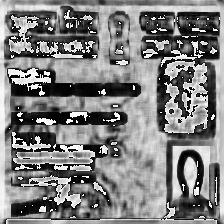

In [92]:
diff_image=Image.fromarray(diff)
diff_image

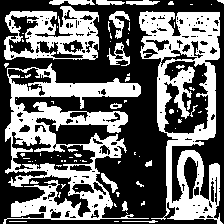

In [93]:
threshold_image=Image.fromarray(threshold)
threshold_image